**Foreword**

The Monty Hall problem is a classic thought experiment in probability. It derives its name from Monty Hall who was the host in the game show, "Lets Make A Deal". On the show, the contestant is presented with 3 curtains. The contestant is told that behind one of these curtains is a prize and the other curtains are empty. 

The contestant is than told to choose one curtain. After the contestant choses a curtain, the host reveals one of the two remaining curtains as empty. The contestant is then asked by the host whether they would like to switch curtains or not, before he reveals the curtain that has the prize. 

The simulation experiment in this case is to test which is the better option for the contestant to switch curtains or not switch curtains before the reveal. 


**Technical Implementation**

---



In [46]:
import random
import numpy as np

switch_wins = 0
no_switch_wins = 0
num_of_curtains = 3
  
for x in range(10000):
  curtains = np.array([0 for i in range(num_of_curtains)])
    
  #generate random prize curtain
  prize_indx = random.randint(0,len(curtains)-1)
  curtains[prize_indx] = curtains[prize_indx] + 1 

  #generate random pick
  contest_pick = random.randint(0,len(curtains)-1)
  curtains[contest_pick] = curtains[contest_pick] + 1
    
  #get empty elements 
  if 2 in curtains:
    no_switch_wins = no_switch_wins + 1
      
  else:
    switch_wins = switch_wins + 1

print("There are initially", num_of_curtains, "curtains")
print("Number of wins after the contestant switch:", switch_wins)
print("Number of wins when the contestant did not switch:", no_switch_wins)
print("There are {0:.2f}".format(switch_wins/no_switch_wins),"x more wins after the contestant switched")

There are initially 3 curtains
Number of wins after the contestant switch: 6682
Number of wins when the contestant did not switch: 3318
There are 2.01 x more wins after the contestant switched


As you can see in the above simulation, after playing the game with 3 curtains for 10000 times. The contestant would have won 6682 times if he had adopted the strategy of switching curtains or he would have won 3318 times if he did not switch curtains. This is means that the contestant will win 2.01x more times when he switches curtains. 

**So why is this the case?**

Since there is 1 prize behind 3 curtains. The probability of the contestant initially picking the right curtain with the prize behind it on the first turn is 1/3. The chance of the contestant initially picking the wrong curtain without the prize behind is 2/3. 

If you chose the right curtain, then in order to win you should not switch. But if you chose the wrong curtain, you need to switch to the remaining curtain to win. 

Since the probability of initially choosing the right curtain is 1/3, and initially choosing the wrong curtain is 2/3. Then it always makes sense to switch, because it is more likely that you initially chose the wrong curtain.



Text(0, 0.5, 'Number of Wins after 10,000 games')

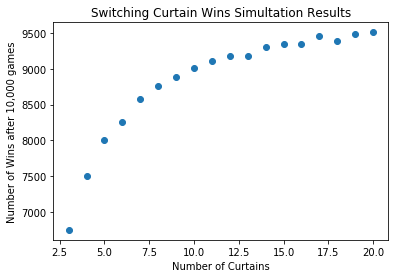

In [45]:
import random
import numpy as np

switch_win_dist = []
no_switch_win_dist = []
num_of_curtains = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


for y in num_of_curtains:
  no_switch_wins = 0
  switch_wins = 0
  
  for x in range(10000):
    curtains = np.array([0 for i in range(y)])
    
    #generate random prize curtain
    prize_indx = random.randint(0, y-1)
    curtains[prize_indx] = curtains[prize_indx] + 1 

    
    #generate random pick
    contest_pick_indx = random.randint(0,y-1)
    curtains[contest_pick] = curtains[contest_pick] + 1
    
    if 2 in curtains:
      no_switch_wins = no_switch_wins + 1
      
    else:
      switch_wins = switch_wins + 1
  
  switch_win_dist.append(switch_wins)
  no_switch_win_dist.append(no_switch_wins)

x = num_of_curtains
y = switch_win_dist
  
import matplotlib.pyplot as plt
ax1 = plt.subplot()
plt.plot(x, y, 'o', label='original data')
ax1.set_title("Switching Curtain Wins Simultation Results")
ax1.set_xlabel("Number of Curtains")
ax1.set_ylabel('Number of Wins after 10,000 games')

In the code above, I run this simulation again, but this time it is over a range of curtains from 3 to 20. As you can see the number of wins for the contestant that switches steadly increases as the number of curtains increase. At 20 curtains, the contestant would win 9,500 games out of 10,000, which is a 95% win rate. The reason why win rates for the contestant that switches increases with the number of curtains, is that the probability of choosing the correct curtain on the first turn steadily decreases from 1/3  at 3 curtains to 1/20 at 20 curtains. Thus at 20 curtains, the contestant that switches has 19/20 chance of winning which translates to a 95% chance of winning. This is backed up by our simulation which shows the contestant that switches won 9,500 out of 10,000 games when there were 20 curtains which equals a 95% win rate.

In fact when we plot the expected wins for switching vs the actual wins in our simulation, we can see a very good fit:




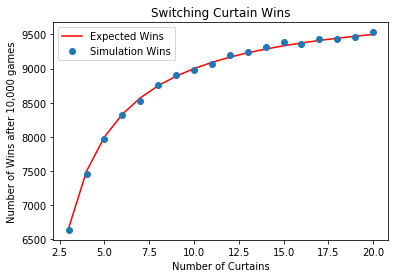

In [43]:
prob_of_not_choosing_prize_on_1_try = [(1-(1/i))*10000 for i in num_of_curtains]
ax2 = plt.subplot()
plt.plot(num_of_curtains, prob_of_not_choosing_prize_on_1_try, 'r', label='Expected Wins')
plt.plot(x, y, 'o', label='Simulation Wins')
ax2.set_title("Switching Curtain Wins")
ax2.set_xlabel("Number of Curtains")
ax2.set_ylabel('Number of Wins after 10,000 games')
plt.legend()

In conclusion, my simulation proves that in a Monty Hall game, it is always advantageous for the contestant to switch after the first pick.